In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import os
os.chdir(os.path.abspath(''))
print(os.getcwd())

c:\Users\vince\OneDrive\Bureau\Etudes_EPFL\Master_CSE\Master1\Semestre1\Machine_learning\Project2\spatial_data


In [59]:

# Assuming `matrix_pos` and `cell_density` are defined
# Example data for demonstration purposes:
# matrix_pos = np.random.rand(100, 2) * 10  # Random positions in a 10x10 area
# cell_density = np.random.rand(100, 1)     # Random density values

# Load data from CSV files
folder = r"data_from_antoine/"
df = pd.read_csv(folder + 'matrix_pos.csv')


In [60]:

cell_density = pd.read_csv(folder + 'cell_density.csv', index_col=0)  
cell_density.head()


,Value
0,0
1,406
2,418
3,439
4,488


In [61]:

cell_density_50 = pd.read_csv(folder + 'cell_density_50.csv', index_col=0)
cell_density_50.head()


,Value
0,0
1,50
2,65
3,70
4,62


In [62]:
print(np.max(cell_density.values), np.min(cell_density.values))
df['Density'] = cell_density.values
df.head()


1586 0


,X,Y,Density
0,206.089813,1495.898193,0
1,201.765823,1816.210815,406
2,179.024506,2167.253906,418
3,186.060654,2163.309082,439
4,200.246887,2198.593506,488


In [63]:
df_50= df.copy()
df_50['Density'] = cell_density_50.values
df_50.head()

,X,Y,Density
0,206.089813,1495.898193,0
1,201.765823,1816.210815,50
2,179.024506,2167.253906,65
3,186.060654,2163.309082,70
4,200.246887,2198.593506,62


In [68]:

df['X'] = pd.to_numeric(df['X'], errors='coerce')
df['Y'] = pd.to_numeric(df['Y'], errors='coerce')

# Define grid points for the heatmap
grid_x, grid_y = np.mgrid[
    df['X'].min():df['X'].max():1000j, 
    df['Y'].min():df['Y'].max():1000j
]

# Interpolate the data to fit the grid
grid_z = griddata(
    points=df[['X', 'Y']].values, values=df['Density'].values, 
    xi=(grid_x, grid_y), method='cubic'
)
grid_z = np.ma.masked_invalid(grid_z)
grid_z_masked = np.ma.masked_less(grid_z, 0)


In [74]:
df_50['X'] = pd.to_numeric(df_50['X'], errors='coerce')
df_50['Y'] = pd.to_numeric(df_50['Y'], errors='coerce')

# Define grid points for the heatmap
grid_x_50, grid_y_50 = np.mgrid[
    df_50['X'].min():df_50['X'].max():1000j, 
    df_50['Y'].min():df_50['Y'].max():1000j
]

# Interpolate the data to fit the grid
grid_z_50 = griddata(
    points=df_50[['X', 'Y']].values, values=df_50['Density'].values, 
    xi=(grid_x, grid_y), method='cubic'
)
grid_z_50 = np.ma.masked_invalid(grid_z_50)
grid_z_masked_50 = np.ma.masked_less(grid_z_50, 0)

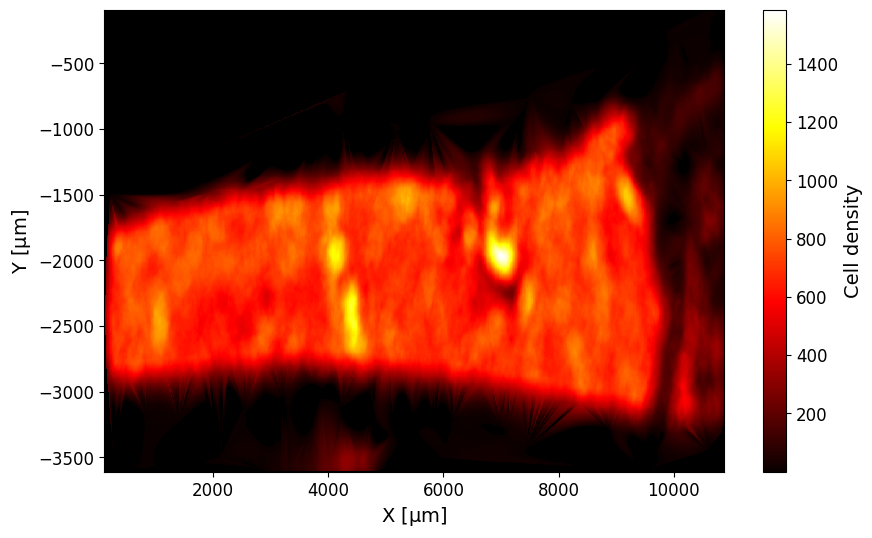

In [70]:

# Plot the heatmap
plt.figure(figsize=(10, 6))
ax= plt.gca()
heatmap = plt.pcolormesh(grid_x, -grid_y, grid_z_masked, shading='auto', cmap='hot')
ax.set_facecolor('black')
cbar = plt.colorbar(heatmap)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='Cell density', fontsize = 14)
ax.set_xlabel(r"X [$\mathrm{\mu m}$]", fontsize= 14)
ax.set_ylabel(r"Y [$\mathrm{\mu m}$]", fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
#plt.savefig(r"C:\Users\vince\OneDrive\Bureau\Etudes_EPFL\Master_CSE\Master1\Semestre1\Machine_learning\Project2\Figures\heatmap_density.png", format = 'png')
plt.show()


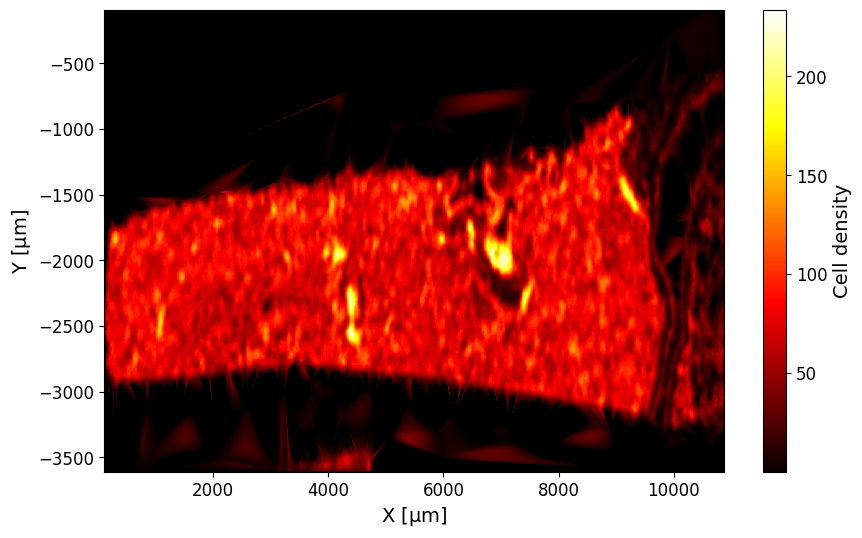

In [78]:

# Plot the heatmap
plt.figure(figsize=(10, 6))
ax= plt.gca()
heatmap = plt.pcolormesh(grid_x_50, -grid_y_50, grid_z_masked_50, shading='auto', cmap='hot')
ax.set_facecolor('black')
cbar = plt.colorbar(heatmap)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='Cell density', fontsize = 14)
ax.set_xlabel(r"X [$\mathrm{\mu m}$]", fontsize= 14)
ax.set_ylabel(r"Y [$\mathrm{\mu m}$]", fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.savefig(r"C:\Users\vince\OneDrive\Bureau\Etudes_EPFL\Master_CSE\Master1\Semestre1\Machine_learning\Project2\Figures\heatmap_density_50.eps", format = 'eps', bbox_inches='tight')
plt.show()